# Project Description:
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available


Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories


Prediction :   Make two prediction
1) Primary Fuel   
2) capacity_mw 

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

In [2]:
df_Aus=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv")
df_Ind=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")
df_Usa=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv")

In [3]:
df_Aus.shape

(512, 27)

In [4]:
df_Aus.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_Ind.shape

(907, 27)

In [6]:
df_Ind.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
df_Usa.shape

(11879, 27)

In [8]:
df_Usa.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_Aus.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [10]:
df_Ind.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
df_Usa.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


Observation:
All the three datasests have the same variables.

Next:
Concatenating the data sets for AUS, IND and USA row wise



In [12]:
df=pd.concat([df_Aus,df_Ind,df_Usa],axis=0)

In [13]:
df.shape

(13298, 27)


Observation:
The number of rows of the concatenated dataset is the sum total of the rows of each individual datasets, whereas the number of columns is same as that of each of the individual datasets.
    Now, we can say that the datasets have been concatenated properly.

 ***Visualize first 5 rows of the concatenated dataset.

In [14]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489,1.670,1.23349,2.630,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN
11878,USA,United States of America,eBay - South Jordan,USA0059281,9.8,40.5606,-112.0478,Gas,NaN,NaN,...,2019.0,12.968,51.27600,71.505,76.392,76.63100,75.228,72.06506,U.S. Energy Information Administration,NaN


# Exploratory Data Analysis (EDA)

***Check Data types

In [16]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

***Observations:

***Categorical variables: 

'country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2',                             'other_fuel3', 'owner','source', 'url', 'geolocation_source', 'generation_gwh_2019' and '                                     'generation_data_source'

***Numerical variables:

'capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', '                         generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',    '                             generation_gwh_2017', 'generation_gwh_2018', and 'estimated_generation_gwh'

***generation_gwh_2019' is of wrong data type. It should be numerical variable.

Check for Missing Values:

In [17]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

    There are all the values missing in variables: wepp_id, and estimated_generation_gwh.
    
    There are a large number of values missing in varaibles: other_fuel1, other_fuel2, and other_fuel3
    
 Dropping the variables: 

***Wepp_id, estimated_generation_gwh, other_fuel1, other_fuel2, and other_fuel3 from the dataframe


In [18]:
df1=df.drop(columns=['wepp_id','estimated_generation_gwh','other_fuel1','other_fuel2','other_fuel3'],inplace=False)

In [19]:
df1.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [20]:
df1.shape

(13298, 22)


Observation:

After dropping the variables, the number of columns has reduced to 22 from 27.



In [21]:
df1.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019        object
generation_data_source     object
dtype: object

Observation:

***The categorical variables, country, country_long, name, gppd_idnr, owner, source, url, geolocation_source, and generation_data_source basically represent some form of identity. Hence they can be safely dropped from the dataframe without affecting the performance of the model.


***Dropping the variables: country, country_long, name, gppd_idnr, owner, source, url, geolocation_source, and generation_data_source from dataframe.

In [22]:
df2=df1.drop(columns=['country','country_long','name','gppd_idnr','owner','source','url','geolocation_source','generation_data_source'],inplace=False)

In [23]:
df2.shape

(13298, 13)

Observation:
***After dropping the variables 'country','country_long','name','gppd_idnr','owner','source','url','geolocation_source',and 'generation_data_source', the number of columns has reduced to 13.

In [24]:
#heck number of unique values
df2.nunique()

capacity_mw               2304
latitude                 12385
longitude                12733
primary_fuel                14
commissioning_year        1936
year_of_capacity_data        1
generation_gwh_2013       5616
generation_gwh_2014       6306
generation_gwh_2015       6692
generation_gwh_2016       7150
generation_gwh_2017       7630
generation_gwh_2018       8040
generation_gwh_2019       8368
dtype: int64

Observation

***Variable 'year_of_capacity_data' has only one unique value.Therefore it can be dropped as it is fixed all accross the rows

Dropping the variable 'year_of_capacity_data'

In [25]:
df3=df2.drop(columns='year_of_capacity_data',inplace=False)

In [26]:
df3.shape

(13298, 12)

There are only 12 variables after dropping 'year_of_capacity_data'

In [27]:
df3.isnull().sum()

capacity_mw               6
latitude                 78
longitude                78
primary_fuel           2004
commissioning_year     2644
generation_gwh_2013    6128
generation_gwh_2014    5764
generation_gwh_2015    5305
generation_gwh_2016    4597
generation_gwh_2017    4006
generation_gwh_2018    3440
generation_gwh_2019    3520
dtype: int64

Observation:

***There are very few missing values in capacity_mw, latitude and longitude. The respective rows can be dropped.


Dropping the rows with missing values of capacity_mw, latitude and longitude.

In [28]:
df4=df3.dropna(subset=['latitude','longitude','capacity_mw'], inplace=False)

In [29]:
df4.shape

(13214, 12)

Number of rows reduced from 13298 to 13214, which is a reduction of 0.63 % of data.

***The reduction of 0.63% of data is reasonable enough. This is not expected to affect the model performance very adversely.
***To check the status of missing values in the data frame after dropping these rows.


In [30]:
df4.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel           1976
commissioning_year     2601
generation_gwh_2013    6064
generation_gwh_2014    5688
generation_gwh_2015    5231
generation_gwh_2016    4525
generation_gwh_2017    3936
generation_gwh_2018    3370
generation_gwh_2019    3436
dtype: int64


Observation:
***As expected, now there are no missing values in the variables: 'capacity_mw', 'latitude' and 'longitude'.


In [31]:
df4.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
generation_gwh_2019     object
dtype: object

Observation:
**Data type of variable 'generation_gwh_2019' is categorical.


***To change the data type of 'generation_gwh_2019' to numerical.

***Changing data type of "generation_gwh_2019" to float

In [32]:
df4['generation_gwh_2019'].unique

<bound method Series.unique of 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
11874       1.211
11875       1.589
11876         NaN
11877         NaN
11878    72.06506
Name: generation_gwh_2019, Length: 13214, dtype: object>

In [33]:
# Replace 'Central Electricity Authority' with NaN in the column 'generation_gwh_2019'

df4['generation_gwh_2019'] = df4['generation_gwh_2019'].replace('Central Electricity Authority', np.nan)

C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\2641208781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['generation_gwh_2019'] = df4['generation_gwh_2019'].replace('Central Electricity Authority', np.nan)


In [34]:
df4['generation_gwh_2019'].dtype

dtype('float64')

Observation:
data type of "generation_gwh_2019" got changed to float.

***Imputing the missing values of 'generation_gwh_2019', 'generation_gwh_2018', 'generation_gwh_2017', 'generation_gwh_2016', 'generation_gwh_2015', 'generation_gwh_2014', 'generation_gwh_2013' by their mean as they are continuous variable.
***Imputing the missing values of 'primary_fuel' by mode as it is a discrete variable

In [35]:
df4.loc[:, 'generation_gwh_2019'].fillna(df4['generation_gwh_2019'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2018'].fillna(df4['generation_gwh_2018'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2017'].fillna(df4['generation_gwh_2017'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2016'].fillna(df4['generation_gwh_2016'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2015'].fillna(df4['generation_gwh_2015'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2014'].fillna(df4['generation_gwh_2014'].mean(), inplace=True)
df4.loc[:, 'generation_gwh_2013'].fillna(df4['generation_gwh_2013'].mean(), inplace=True)
df4.loc[:, 'primary_fuel'].fillna(df4['primary_fuel'].mode()[0], inplace=True)

C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\4219489495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'generation_gwh_2019'].fillna(df4['generation_gwh_2019'].mean(), inplace=True)
C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\4219489495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'generation_gwh_2018'].fillna(df4['generation_gwh_2018'].mean(), inplace=True)
C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\4219489495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13214 non-null  float64
 1   latitude             13214 non-null  float64
 2   longitude            13214 non-null  float64
 3   primary_fuel         13214 non-null  object 
 4   commissioning_year   10613 non-null  float64
 5   generation_gwh_2013  13214 non-null  float64
 6   generation_gwh_2014  13214 non-null  float64
 7   generation_gwh_2015  13214 non-null  float64
 8   generation_gwh_2016  13214 non-null  float64
 9   generation_gwh_2017  13214 non-null  float64
 10  generation_gwh_2018  13214 non-null  float64
 11  generation_gwh_2019  13214 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.3+ MB


Observation:
***commissioning_year' is a variable of float64 type.

***To convert variable 'commissioning_year' to datetime.

***Data type conversion: 'commissioning_year'


In [37]:
df4['commissioning_year'] = pd.to_datetime(df4['commissioning_year'], format='%Y')

C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\2947609505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['commissioning_year'] = pd.to_datetime(df4['commissioning_year'], format='%Y')


In [38]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   capacity_mw          13214 non-null  float64       
 1   latitude             13214 non-null  float64       
 2   longitude            13214 non-null  float64       
 3   primary_fuel         13214 non-null  object        
 4   commissioning_year   10613 non-null  datetime64[ns]
 5   generation_gwh_2013  13214 non-null  float64       
 6   generation_gwh_2014  13214 non-null  float64       
 7   generation_gwh_2015  13214 non-null  float64       
 8   generation_gwh_2016  13214 non-null  float64       
 9   generation_gwh_2017  13214 non-null  float64       
 10  generation_gwh_2018  13214 non-null  float64       
 11  generation_gwh_2019  13214 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 1.3+ MB


Observation:
***commissioning_year' got changed to datetime data type.

***Extracting year component from 'commissioning_year'

In [39]:
# Extract year component
df4['commissioning_year'] = df4['commissioning_year'].dt.year
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13214 non-null  float64
 1   latitude             13214 non-null  float64
 2   longitude            13214 non-null  float64
 3   primary_fuel         13214 non-null  object 
 4   commissioning_year   10613 non-null  float64
 5   generation_gwh_2013  13214 non-null  float64
 6   generation_gwh_2014  13214 non-null  float64
 7   generation_gwh_2015  13214 non-null  float64
 8   generation_gwh_2016  13214 non-null  float64
 9   generation_gwh_2017  13214 non-null  float64
 10  generation_gwh_2018  13214 non-null  float64
 11  generation_gwh_2019  13214 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.3+ MB


C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\1300710625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['commissioning_year'] = df4['commissioning_year'].dt.year


In [40]:
df4.loc[:, 'commissioning_year'].fillna(df4['commissioning_year'].mode()[0], inplace=True)

C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\246254158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'commissioning_year'].fillna(df4['commissioning_year'].mode()[0], inplace=True)


In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13214 non-null  float64
 1   latitude             13214 non-null  float64
 2   longitude            13214 non-null  float64
 3   primary_fuel         13214 non-null  object 
 4   commissioning_year   13214 non-null  float64
 5   generation_gwh_2013  13214 non-null  float64
 6   generation_gwh_2014  13214 non-null  float64
 7   generation_gwh_2015  13214 non-null  float64
 8   generation_gwh_2016  13214 non-null  float64
 9   generation_gwh_2017  13214 non-null  float64
 10  generation_gwh_2018  13214 non-null  float64
 11  generation_gwh_2019  13214 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.3+ MB


***To change the data type 'commissioning_year' to integer.

In [42]:
df4['commissioning_year']=df4['commissioning_year'].astype(int)

C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\2165200664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['commissioning_year']=df4['commissioning_year'].astype(int)


In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13214 non-null  float64
 1   latitude             13214 non-null  float64
 2   longitude            13214 non-null  float64
 3   primary_fuel         13214 non-null  object 
 4   commissioning_year   13214 non-null  int32  
 5   generation_gwh_2013  13214 non-null  float64
 6   generation_gwh_2014  13214 non-null  float64
 7   generation_gwh_2015  13214 non-null  float64
 8   generation_gwh_2016  13214 non-null  float64
 9   generation_gwh_2017  13214 non-null  float64
 10  generation_gwh_2018  13214 non-null  float64
 11  generation_gwh_2019  13214 non-null  float64
dtypes: float64(10), int32(1), object(1)
memory usage: 1.3+ MB


***To visualize the distribution of numerical variables using histograms.

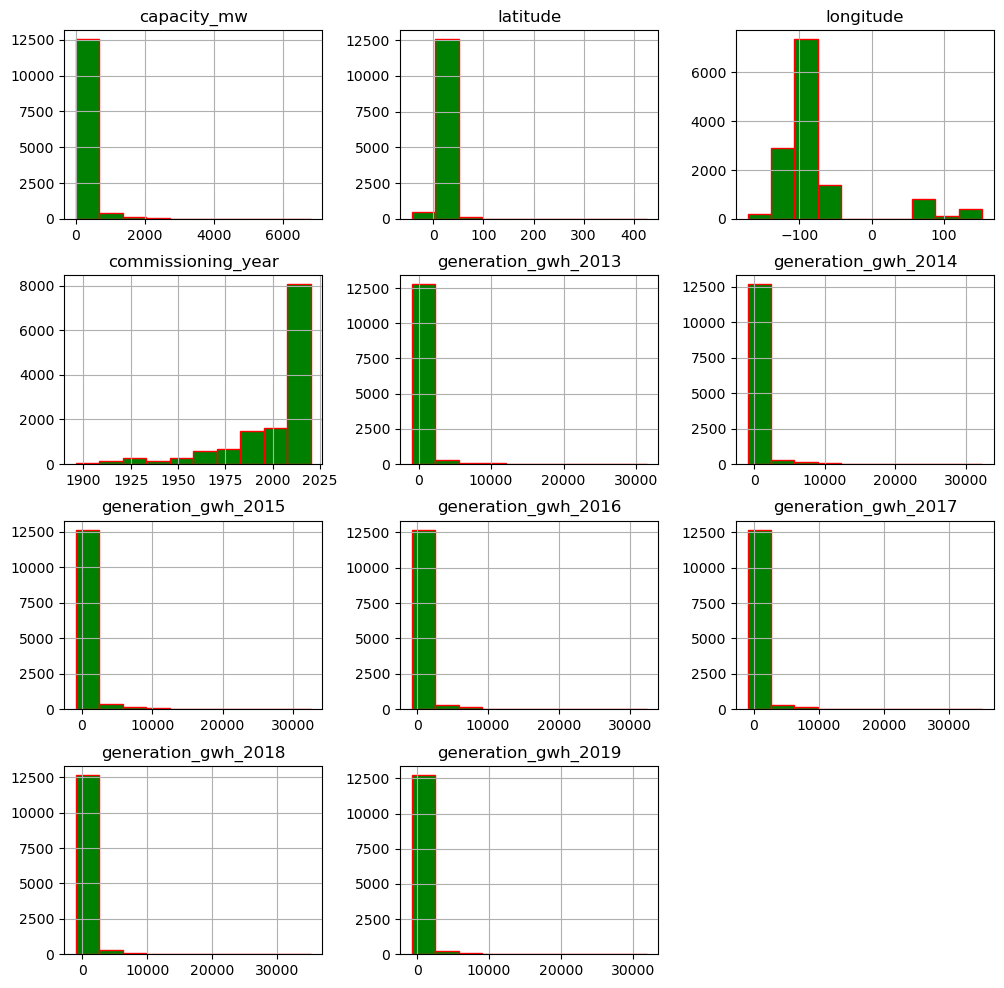

In [75]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019']
df4[Numerical].hist(figsize=(12,12),ec='red',color='green')
plt.show()

In [45]:
print('The skewness of the variables are:\n')
df4.skew()

The skewness of the variables are:



C:\Users\MIS\AppData\Local\Temp\ipykernel_8388\2547026437.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.skew()


capacity_mw            5.459051
latitude              -1.850053
longitude              2.328446
commissioning_year    -1.944708
generation_gwh_2013    8.458157
generation_gwh_2014    7.997737
generation_gwh_2015    8.161552
generation_gwh_2016    8.232859
generation_gwh_2017    8.319090
generation_gwh_2018    8.257216
generation_gwh_2019    8.846119
dtype: float64

To check outliers of the variables using boxplot.

***BOXPLOT

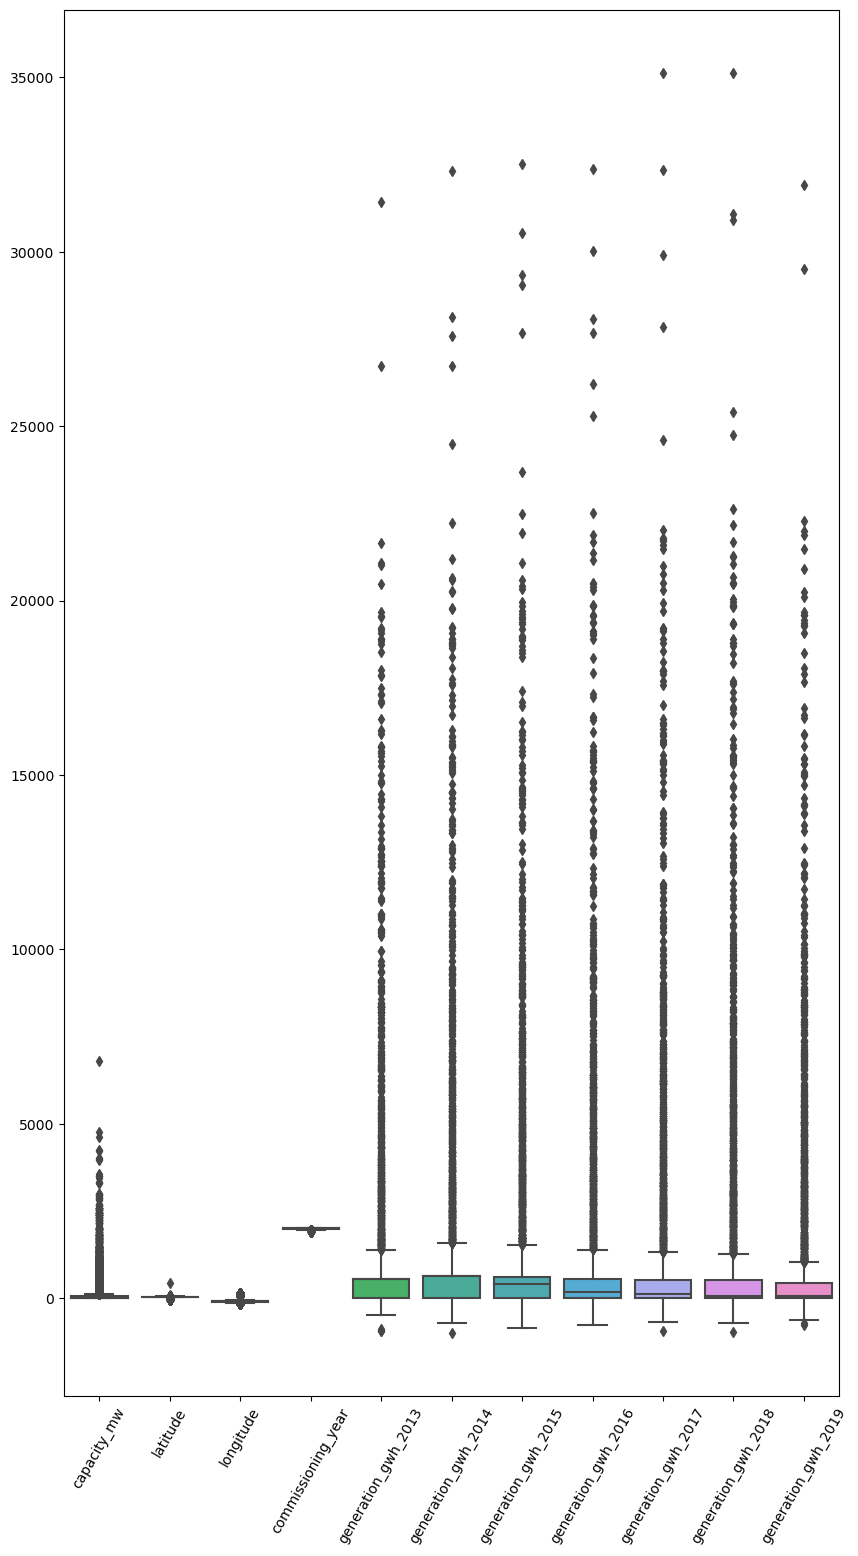

In [46]:
plt.figure(figsize=(10,18))

# for i in Numerical:

sns.boxplot(data=df4[Numerical])
plt.xticks(rotation=60)
plt.show()

Observation:
***There are significant outliers.

***COUNTPLOT

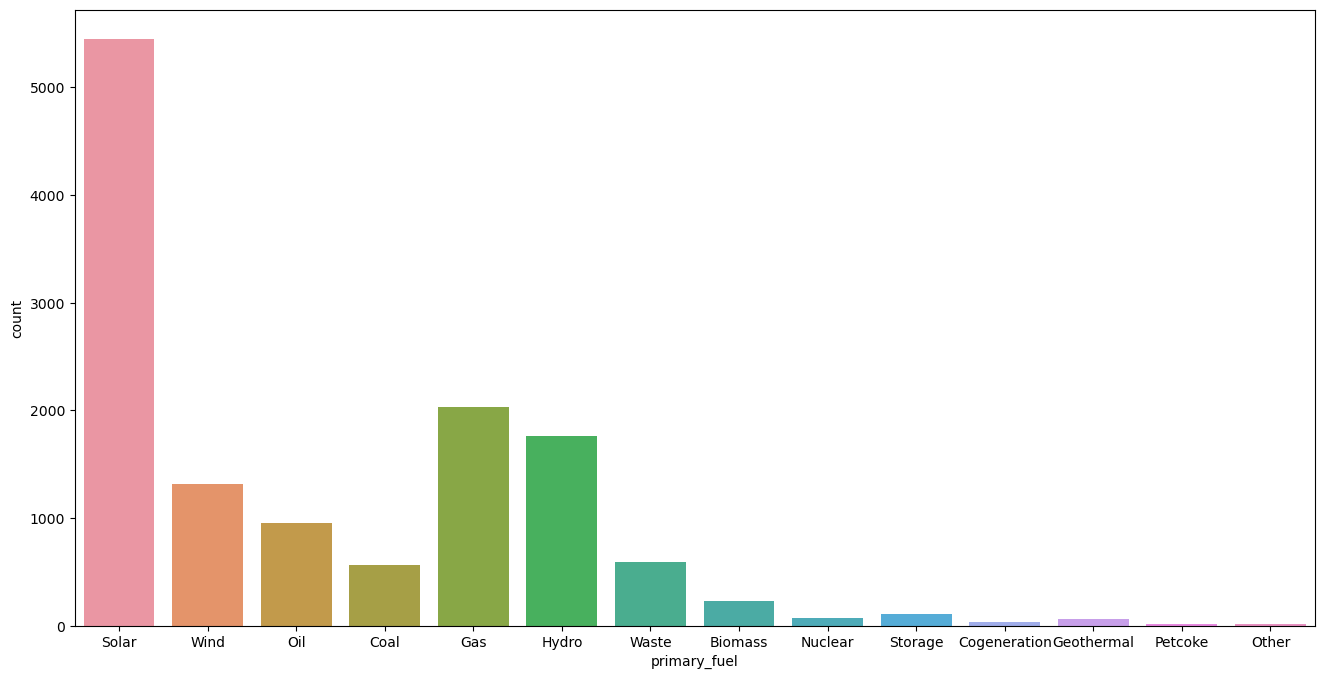

In [47]:
plt.figure(figsize=(16, 8))
sns.countplot(x='primary_fuel', data=df4)
plt.xticks(rotation=0)
plt.show()

Correlation Analysis:
***To compute and visualize pairwise correlations between numerical variables using heatmap.
***To identify highly correlated variables (correlation coefficient > 0.7 or < -0.7).


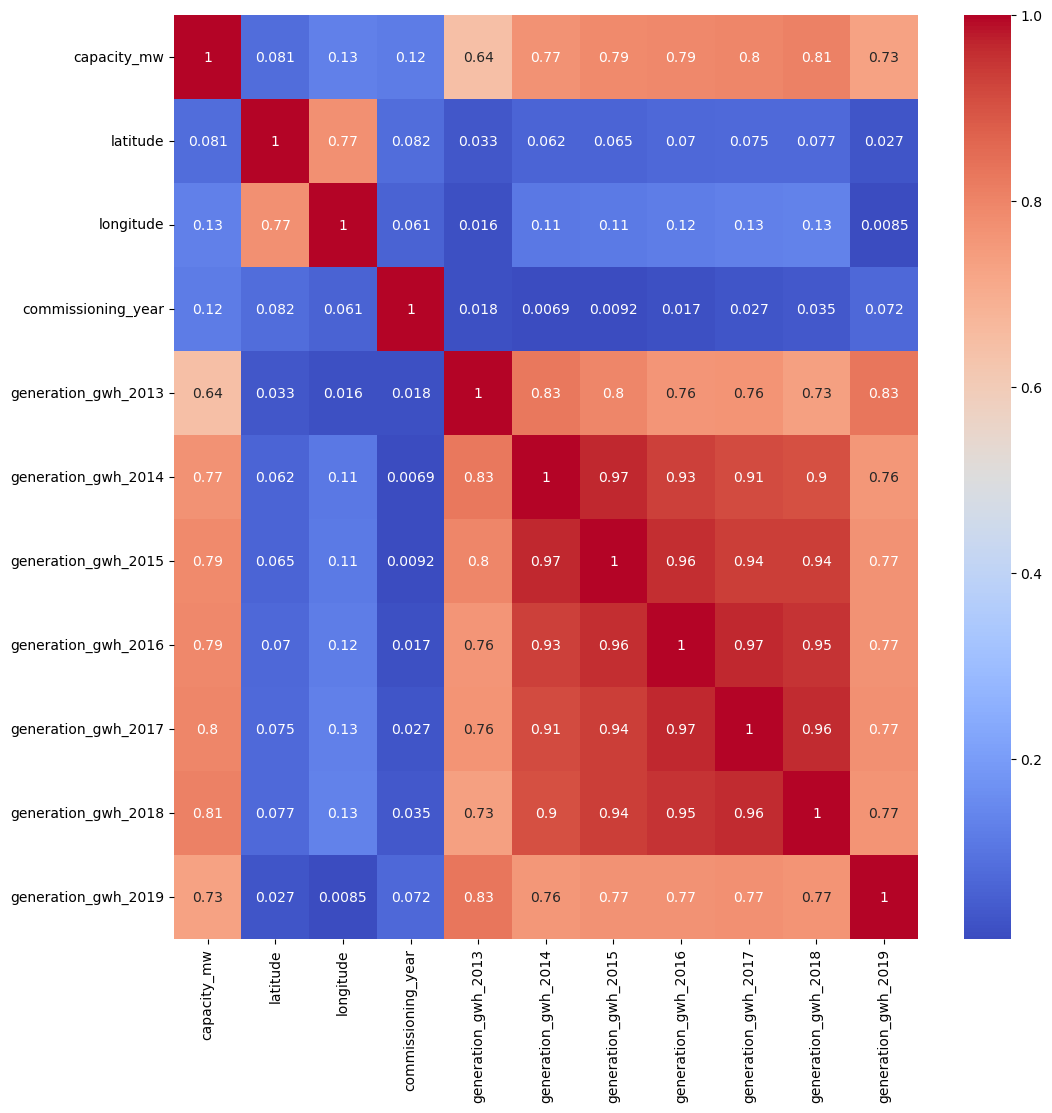

In [48]:
# Heatmap for correlation coefficient
plt.figure(figsize=(12,12))
sns.heatmap(abs(df4[Numerical].corr()),annot=True,cmap='coolwarm')
plt.show()

***
Observation:
    Highly correlated variables with each other: 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'

    'capacity_mw' is higly correlated with each of 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'



# 1) Prediction: Primary Fuel
(v) Feature Engineering:

    To transform variables (using Box cox transformation) to address skewness.



In [49]:
from scipy.stats import boxcox

# DataFrame to store transformed features
df4_skewed = pd.DataFrame()
df4_reset=df4[Numerical].reset_index(drop=True,inplace=False)   # reset index of df4df4.reset_index(drop=True, inplace=True)
print('Skewness of variables are:\n')
for i in ['capacity_mw','longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019']:
    
    df4_positive= df4_reset[i] - df4_reset[i].min() + 0.01             # Add a small constant to ensure positivity
    
    transformed_feature, lambda_value = boxcox(df4_positive)  
    
    df4_skewed[i] = transformed_feature
    
    # Compute skewness of the transformed feature
    skewness = pd.Series(transformed_feature).skew()
    
    print(f"{i}: {skewness:.3f}")

Skewness of variables are:

capacity_mw: -0.035
longitude: 0.022
commissioning_year: -0.771
generation_gwh_2013: 0.209
generation_gwh_2014: -0.342
generation_gwh_2015: -0.482
generation_gwh_2016: -0.615
generation_gwh_2017: -0.615
generation_gwh_2018: -0.643
generation_gwh_2019: -0.751



Observation:

***Skewness of the variables have considerably reduced after the boxcox transformation
***To replace the variables by their transformed values



In [50]:
df4_skewed.head()

,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,-1.969324,5.952007,4.219413e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
1,0.009954,5.952182,5.169134e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
2,3.431691,5.877614,5.169134e+07,7.417541,6.335367,5.970646,5.697812,5.961762,6.005457,5.95706
3,-1.320668,5.935797,3.283854e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
4,1.459095,5.952798,4.836426e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706


***Dropping the variables 'capacity_mw','longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019' from df4

In [51]:
df5=df4[['latitude','primary_fuel']]
df5.reset_index(drop=True, inplace=True)
df5.head(10)

,latitude,primary_fuel
0,-34.9387,Solar
1,-34.9453,Solar
2,-35.0641,Wind
3,-23.7966,Solar
4,-34.5509,Oil
5,-34.5034,Oil
6,-38.3861,Coal
7,-13.8584,Oil
8,-34.2082,Gas
9,-37.2385,Wind


Observation:

    Variables dropped: 'capacity_mw','longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019'
    
***Concatenating the transformed values of these variables with df5


In [52]:
df6=pd.concat([df5,df4_skewed],axis=1)
df6.head(10)

,latitude,primary_fuel,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,-34.9387,Solar,-1.969324,5.952007,4.219413e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
1,-34.9453,Solar,0.009954,5.952182,5.169134e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
2,-35.0641,Wind,3.431691,5.877614,5.169134e+07,7.417541,6.335367,5.970646,5.697812,5.961762,6.005457,5.95706
3,-23.7966,Solar,-1.320668,5.935797,3.283854e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
4,-34.5509,Oil,1.459095,5.952798,4.836426e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
5,-34.5034,Oil,4.505334,5.953694,3.406915e+07,7.847840,6.658626,5.892431,5.619822,5.903075,5.940804,5.95706
6,-38.3861,Coal,6.146648,5.971406,7.261129e+06,8.194980,6.912582,6.556427,5.753911,6.226257,6.246355,5.95706
7,-13.8584,Oil,1.343625,5.944643,4.074851e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
8,-34.2082,Gas,4.645731,5.993622,3.283854e+07,7.537664,6.430880,6.021183,5.747192,5.946217,6.010078,5.95706
9,-37.2385,Wind,6.690938,5.967641,3.796896e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706


In [53]:
df6[Numerical].skew()

capacity_mw           -0.035172
latitude              -1.850053
longitude              0.021800
commissioning_year    -0.771371
generation_gwh_2013    0.209058
generation_gwh_2014   -0.342458
generation_gwh_2015   -0.481578
generation_gwh_2016   -0.615022
generation_gwh_2017   -0.615345
generation_gwh_2018   -0.642662
generation_gwh_2019   -0.750850
dtype: float64


Observation:

***The transformed variables have been properly concatenated with the df5 data frame.

***To appropriately encode categorical variables('primary_fuel').

# Categorical to numerical transformation:'primary_fuel'

In [54]:
df6['primary_fuel'].unique().tolist()

['Solar',
 'Wind',
 'Oil',
 'Coal',
 'Gas',
 'Hydro',
 'Waste',
 'Biomass',
 'Nuclear',
 'Storage',
 'Cogeneration',
 'Geothermal',
 'Petcoke',
 'Other']

In [55]:
len(['Solar','Wind','Oil','Coal','Gas','Hydro','Waste','Biomass','Nuclear','Storage','Cogeneration','Geothermal','Petcoke',

'Other'])

14


Observation:

    There are 14 unique values in the variable 'primary_fuel'.

Next:

    To convert each of these unique values into numerical.

    As the variable 'primary_fuel' is the target label, therefore each unique value in them will be mapped against an integer.



In [56]:
df6['primary_fuel']=df6['primary_fuel'].map({"Solar":0,"Gas":1,"Hydro":2,"Wind":3,"Oil":4,"Waste":5,"Coal":6,"Biomass":7,"Storage":8,"Nuclear":9,"Geothermal":10,"Cogeneration":11,"Other":12,"Petcoke":13})

In [57]:
df6.head(10)

,latitude,primary_fuel,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,-34.9387,0,-1.969324,5.952007,4.219413e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
1,-34.9453,0,0.009954,5.952182,5.169134e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
2,-35.0641,3,3.431691,5.877614,5.169134e+07,7.417541,6.335367,5.970646,5.697812,5.961762,6.005457,5.95706
3,-23.7966,0,-1.320668,5.935797,3.283854e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
4,-34.5509,4,1.459095,5.952798,4.836426e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
5,-34.5034,4,4.505334,5.953694,3.406915e+07,7.847840,6.658626,5.892431,5.619822,5.903075,5.940804,5.95706
6,-38.3861,6,6.146648,5.971406,7.261129e+06,8.194980,6.912582,6.556427,5.753911,6.226257,6.246355,5.95706
7,-13.8584,4,1.343625,5.944643,4.074851e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706
8,-34.2082,1,4.645731,5.993622,3.283854e+07,7.537664,6.430880,6.021183,5.747192,5.946217,6.010078,5.95706
9,-37.2385,3,6.690938,5.967641,3.796896e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.95706


In [58]:
# Heat map

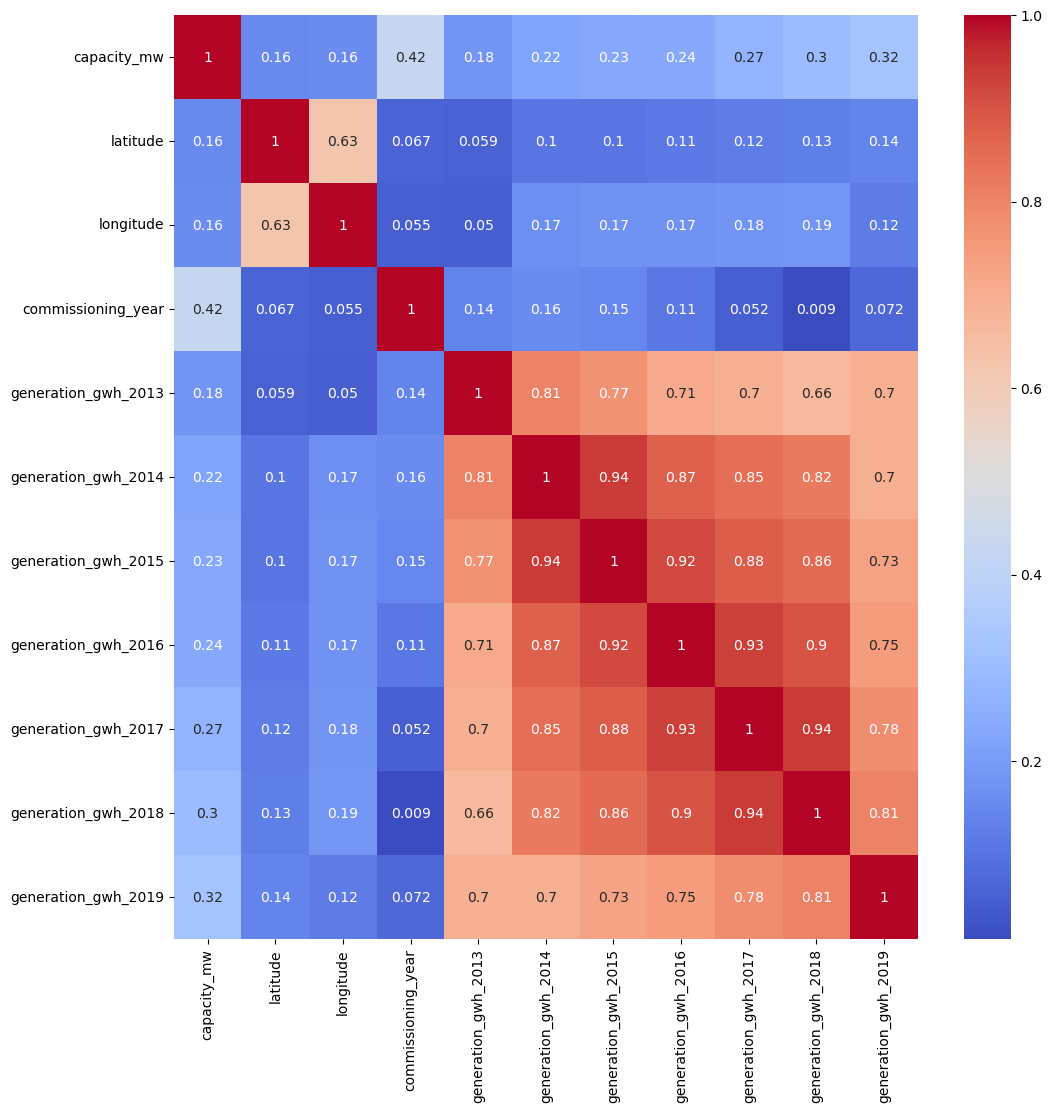

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df6[Numerical].corr()),annot=True,cmap='coolwarm',linecolor='black')
plt.show()


Observation:

    Boxcox transformation has helped to reduce the correlation of the variable 'capacity_mw' with each of 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'

    However, there is still very high multicollinearity in variables: 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'

Next:

    To reduce the multicollinearity of variables: 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'

# Variance Inflation Factor (VIF):

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df6.drop(columns='primary_fuel',inplace=False)
y=df6['primary_fuel']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,latitude,8.70
1,capacity_mw,1.87
2,longitude,103.80
3,commissioning_year,7.70
4,generation_gwh_2013,896.98
5,generation_gwh_2014,3534.90
6,generation_gwh_2015,4225.05
7,generation_gwh_2016,3457.69
8,generation_gwh_2017,4894.00
9,generation_gwh_2018,3905.87



Observation:
*** Variable 'generation_gwh_2017' has the highest VIF value.


***Tree based models like Decision tree, Random forest, GradientBoost algorithms or Regularized regression model like ridge classifier, is also expected to work reasonably well in the presence of multicollinearity.

    To check the scale of variation of different variables.

Scaling of the variables

In [61]:
X.describe()

,latitude,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,13214.000000,13214.000000,13214.000000,1.321400e+04,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000
mean,35.083697,2.182980,4.575192,3.678223e+07,7.700401,6.540283,6.164029,5.859690,6.103925,6.126404,5.835612
std,15.380971,3.565441,0.531386,1.760495e+07,0.480013,0.348941,0.343048,0.334783,0.322115,0.317472,0.307964
min,-42.888300,-3.931997,-4.472855,-2.505014e-01,-4.411613,-4.925005,-5.077919,-5.205658,-5.111227,-5.107822,-5.187137
25%,33.907475,0.418158,4.320054,2.138787e+07,7.332206,6.264800,5.898857,5.620779,5.900969,5.942156,5.656064
50%,38.392350,1.813533,4.562316,4.367784e+07,7.847840,6.658626,6.179162,5.771798,5.976965,5.983501,5.697841
75%,42.175275,4.584134,4.702059,5.169134e+07,7.847840,6.658626,6.292735,5.997394,6.226257,6.246355,5.957060
max,425.246100,12.244734,6.002469,5.699994e+07,11.467408,8.995257,8.445868,8.031034,8.382879,8.395421,8.079966



Observation

    All the variables are within similar range except "commissioning_year".


    Using standard scaler to scale the variables

***Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X)
X2=pd.DataFrame(X1, columns=X.columns)
X2.describe()

,latitude,capacity_mw,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04,1.321400e+04
mean,-6.882811e-17,1.720703e-16,-1.324941e-15,-8.334654e-17,5.527758e-16,-2.890781e-15,-2.873574e-15,2.701503e-15,-7.958251e-16,-2.043335e-15,-8.173339e-17
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-5.069572e+00,-1.715134e+00,-1.702790e+01,-2.089391e+00,-2.523361e+01,-3.285866e+01,-3.277204e+01,-3.305351e+01,-3.481855e+01,-3.538788e+01,-3.579365e+01
25%,-7.647542e-02,-4.949987e-01,-4.801554e-01,-8.744670e-01,-7.670813e-01,-7.895138e-01,-7.730165e-01,-7.136575e-01,-6.300966e-01,-5.803826e-01,-5.830376e-01
50%,2.151216e-01,-1.036228e-01,-2.423266e-02,3.917011e-01,3.071686e-01,3.391624e-01,4.411484e-02,-2.625460e-01,-3.941597e-01,-4.501441e-01,-4.473782e-01
75%,4.610793e-01,6.734777e-01,2.387553e-01,8.469026e-01,3.071686e-01,3.391624e-01,3.751984e-01,4.113374e-01,3.797935e-01,3.778458e-01,3.943713e-01
max,2.536753e+01,2.822129e+00,2.686053e+00,1.148454e+00,7.848008e+00,7.035774e+00,6.651918e+00,6.486063e+00,7.075240e+00,7.147418e+00,7.287984e+00



Observation:
***All the variables have mean within similar range

***Building the model

***To check if the classes are balanced or not

In [63]:
y.value_counts()

0     5451
1     2030
2     1765
3     1320
4      954
5      595
6      567
7      230
8      104
9       72
10      65
11      34
12      16
13      11
Name: primary_fuel, dtype: int64

# Model building

In [64]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

# Best random state

In [65]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=i)
    LR=LogisticRegression(solver='saga')
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Acc=accuracy_score(y_test,y_pred)
    if Acc>maxAcc:
        maxAcc=Acc
        random=i
print(f'Max accuracy: {round(maxAcc,2)}')
print(f'Best_random_state: {random}')

C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached 

Max accuracy: 0.68
Best_random_state: 324


C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# (2) Prediction: capacity_mw

In [74]:
df_encoded = pd.get_dummies(df4, columns=['primary_fuel'],drop_first=True)
df_encoded

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,primary_fuel_Geothermal,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Other,primary_fuel_Petcoke,primary_fuel_Solar,primary_fuel_Storage,primary_fuel_Waste,primary_fuel_Wind
0,0.11,-34.9387,138.5377,2011,563.545827,636.276386,617.294152,561.889956,532.628228,513.780224,...,0,0,0,0,0,0,1,0,0,0
1,1.00,-34.9453,138.5882,2017,563.545827,636.276386,617.294152,561.889956,532.628228,513.780224,...,0,0,0,0,0,0,1,0,0,0
2,21.60,-35.0641,117.7977,2017,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,...,0,0,0,0,0,0,0,0,0,1
3,0.24,-23.7966,133.8971,2004,563.545827,636.276386,617.294152,561.889956,532.628228,513.780224,...,0,0,0,0,0,0,1,0,0,0
4,4.00,-34.5509,138.7659,2015,563.545827,636.276386,617.294152,561.889956,532.628228,513.780224,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,3.40,42.8869,-76.9683,2012,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,...,0,0,0,0,0,0,0,0,0,1
11875,1.00,44.3195,-92.6703,2018,563.545827,636.276386,617.294152,561.889956,532.628228,1.161000,...,0,0,0,0,0,0,1,0,0,0
11876,0.00,44.0460,-92.7600,2017,563.545827,636.276386,617.294152,561.889956,532.628228,513.780224,...,0,0,0,0,0,0,1,0,0,0
11877,0.00,39.7373,-105.0170,2017,0.000000,0.000000,0.000000,561.889956,532.628228,513.780224,...,0,0,0,0,0,0,1,0,0,0


In [67]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 0 to 11878
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   capacity_mw                13214 non-null  float64
 1   latitude                   13214 non-null  float64
 2   longitude                  13214 non-null  float64
 3   commissioning_year         13214 non-null  int32  
 4   generation_gwh_2013        13214 non-null  float64
 5   generation_gwh_2014        13214 non-null  float64
 6   generation_gwh_2015        13214 non-null  float64
 7   generation_gwh_2016        13214 non-null  float64
 8   generation_gwh_2017        13214 non-null  float64
 9   generation_gwh_2018        13214 non-null  float64
 10  generation_gwh_2019        13214 non-null  float64
 11  primary_fuel_Coal          13214 non-null  uint8  
 12  primary_fuel_Cogeneration  13214 non-null  uint8  
 13  primary_fuel_Gas           13214 non-null  uin


Observation:
***The number of columns increased from 12 to 24 as a result of one hot encoding of the "primary fuel".


***To check correlations among the variables

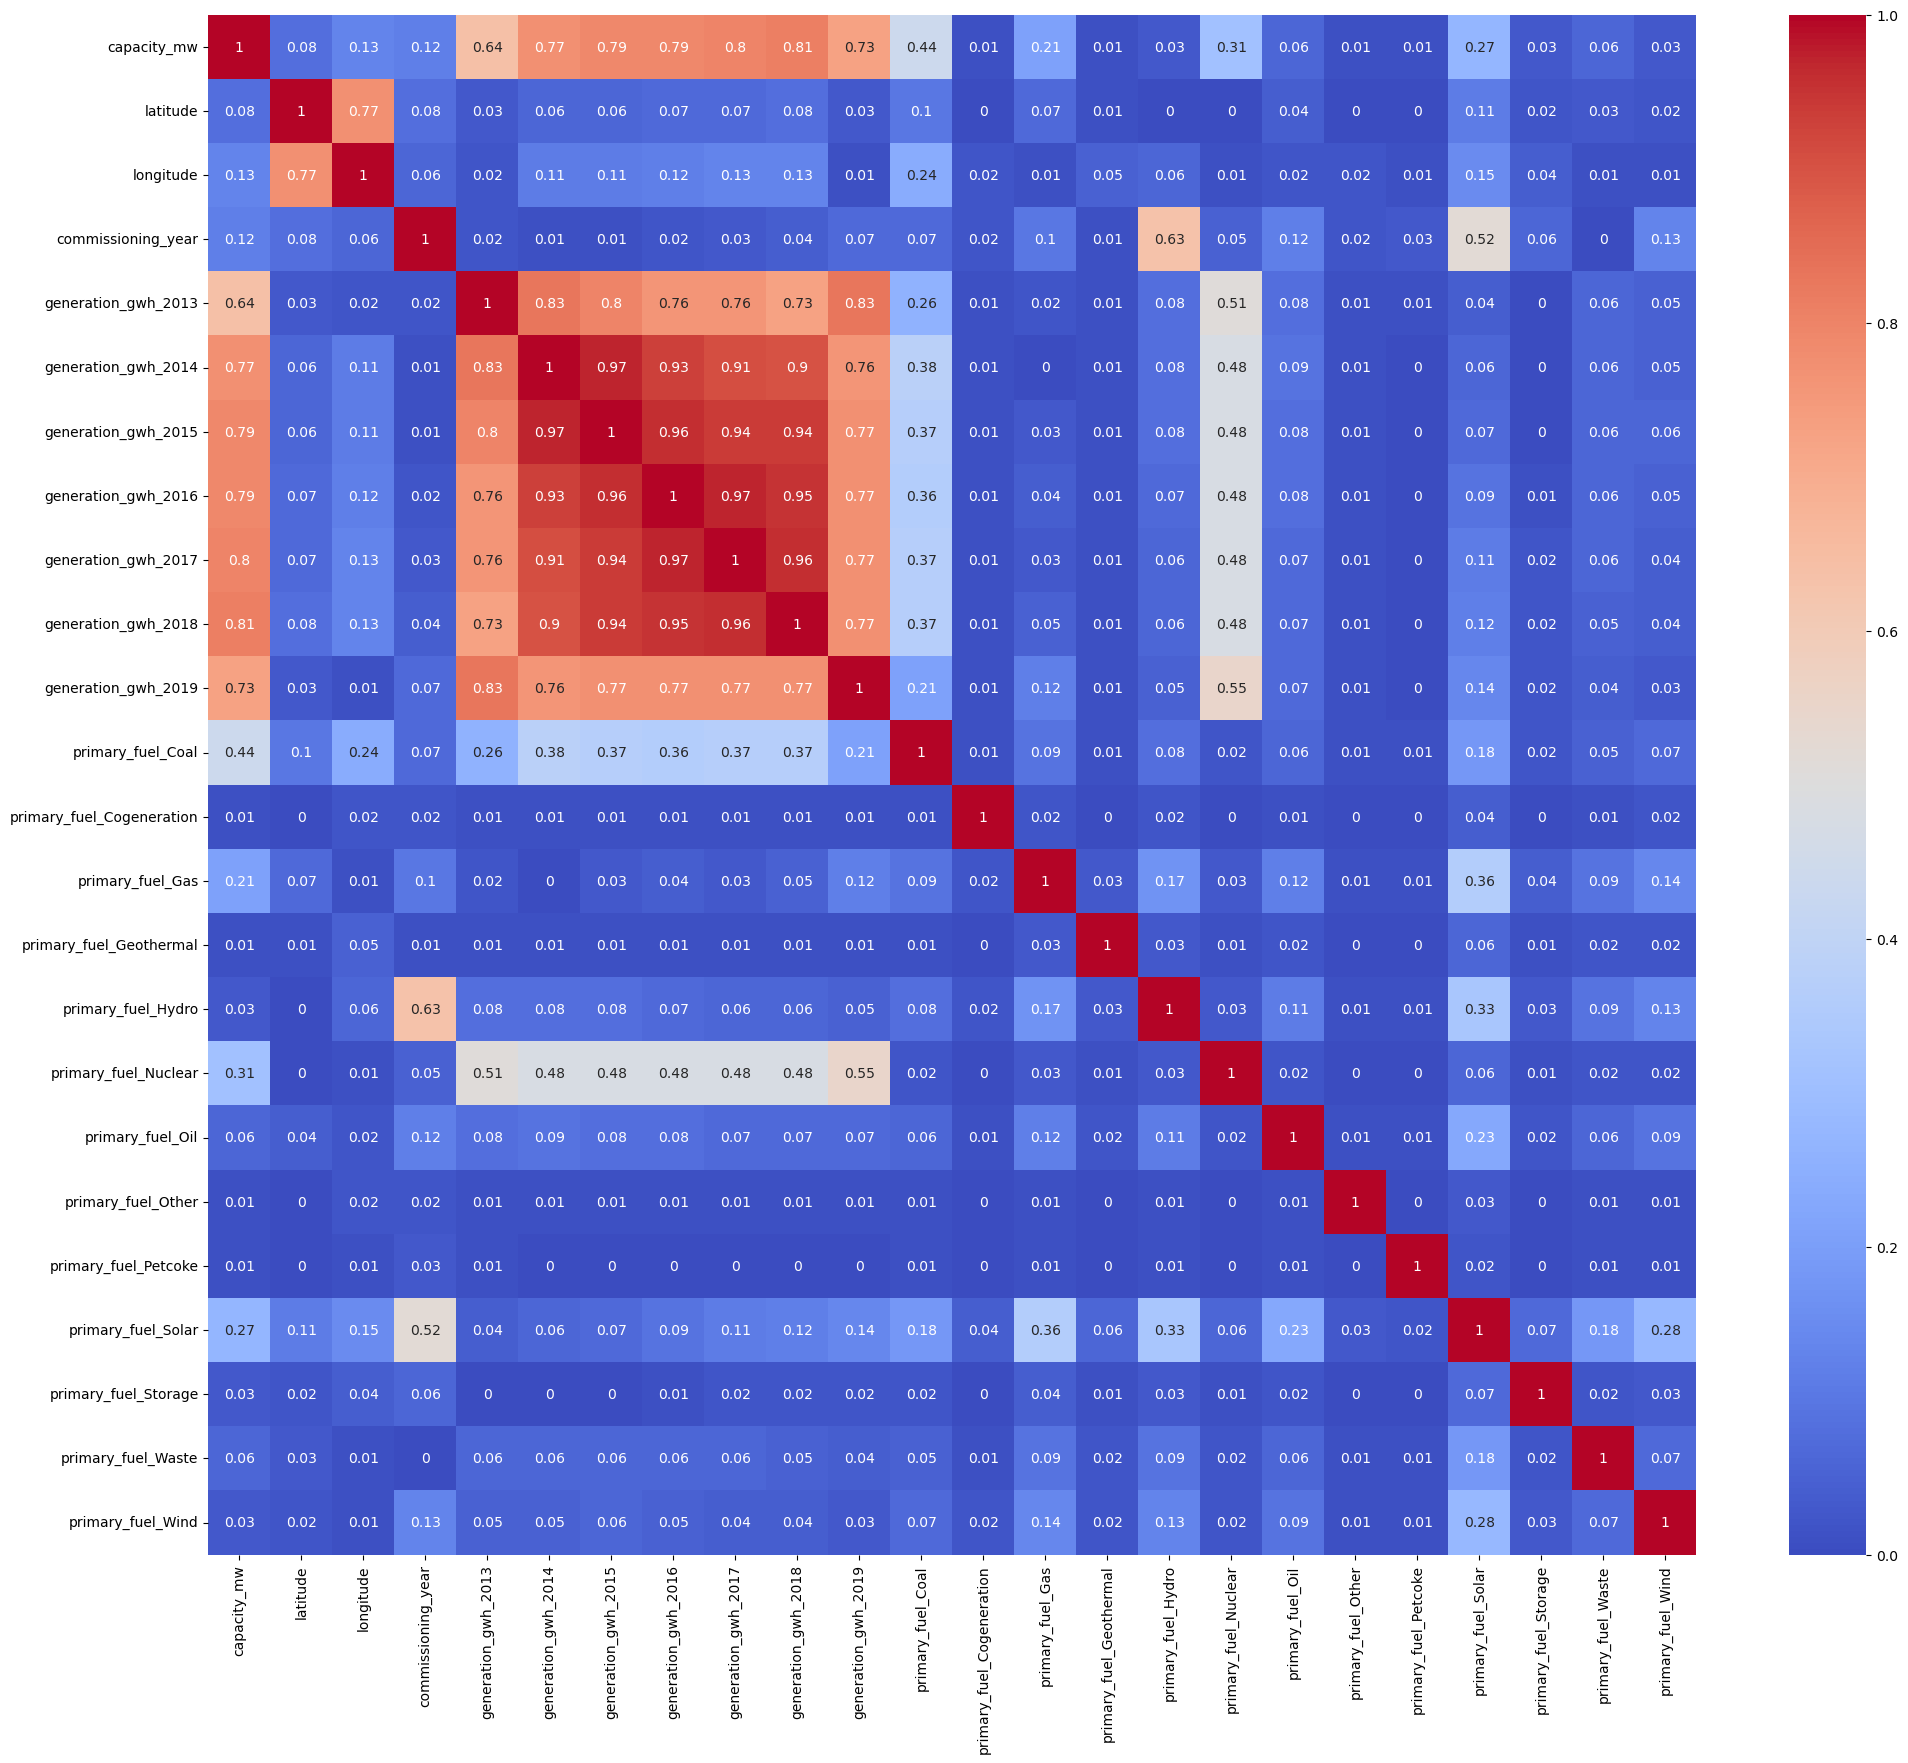

In [68]:
# Heat map
plt.figure(figsize=(24,20))
sns.heatmap(round(abs(df_encoded.corr()),2),annot=True,linecolor='black',cmap='coolwarm')
plt.show()


Observation:
***'capacity_mw' has high correlation with 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'.

***There is very high multicollinearity in variables: 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', and 'generation_gwh_2019'


***Segregating the target variable from the features


In [69]:
X_c=df_encoded.drop(columns='capacity_mw',inplace=False)   # Feature vector
y_c=df_encoded['capacity_mw']                              # Target variable

# Scaling of the variables

In [70]:
X_c.describe()

,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,...,primary_fuel_Geothermal,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Other,primary_fuel_Petcoke,primary_fuel_Solar,primary_fuel_Storage,primary_fuel_Waste,primary_fuel_Wind
count,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,...,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000
mean,35.083697,-73.894750,2001.814515,563.545827,636.276386,617.294152,561.889956,532.628228,513.780224,421.938592,...,0.004919,0.133570,0.005449,0.072196,0.001211,0.000832,0.412517,0.007870,0.045028,0.099894
std,15.380971,62.705705,22.870020,1494.165388,1655.931623,1670.612157,1663.600309,1678.127687,1695.713639,1456.125983,...,0.069966,0.340203,0.073617,0.258822,0.034777,0.028841,0.492306,0.088369,0.207373,0.299870
min,-42.888300,-171.712400,1896.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.907475,-104.667675,1993.000000,14.696500,12.395750,9.069250,6.349000,4.960500,4.030500,4.429500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.392350,-87.385950,2012.000000,563.545827,636.276386,406.346500,192.144000,107.257548,61.027000,51.840500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.175275,-75.488700,2017.000000,563.545827,636.276386,617.294152,561.889956,532.628228,513.780224,421.938592,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,425.246100,153.434100,2020.000000,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000,31920.368000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Observation

Mximum values and mean of all the variables are quite varied.


Using normal scaler to scale the variables.



In [71]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X1_c=scale.fit_transform(X_c)
X2_c=pd.DataFrame(X1_c, columns=X_c.columns)
X2_c.describe()

,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,...,primary_fuel_Geothermal,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Other,primary_fuel_Petcoke,primary_fuel_Solar,primary_fuel_Storage,primary_fuel_Waste,primary_fuel_Wind
count,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,...,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000,13214.000000
mean,0.166559,0.300842,0.853343,0.046671,0.048810,0.044376,0.040141,0.040708,0.041430,0.036766,...,0.004919,0.133570,0.005449,0.072196,0.001211,0.000832,0.412517,0.007870,0.045028,0.099894
std,0.032856,0.192854,0.184436,0.046147,0.049712,0.050033,0.050190,0.046549,0.046948,0.044529,...,0.069966,0.340203,0.073617,0.258822,0.034777,0.028841,0.492306,0.088369,0.207373,0.299870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.164046,0.206199,0.782258,0.029720,0.030081,0.026160,0.023380,0.026072,0.027317,0.023999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.173627,0.259349,0.935484,0.046671,0.048810,0.038059,0.028986,0.028909,0.028895,0.025448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.181708,0.295940,0.975806,0.046671,0.048810,0.044376,0.040141,0.040708,0.041430,0.036766,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Observation:

    All the variables have been scaled between 0 and 1.

Next:

    To building the model. The variable 'capacity_mw' to be predicted is a continuous variable.



# Model building

In [72]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

# Best random state

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
r2_max=0
r_state=0
LR=LinearRegression()
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X2_c,y_c,test_size=0.3,random_state=i)
    
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    if r2>r2_max:
        r2_max=r2
        r_state=i
print(f'Best r2 score: {round(r2_max,2)}')
print(f'Random state: {r_state}')

Best r2 score: 0.82
Random state: 583
